In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg

In [4]:
from zipfile import ZipFile

data_path = '/content/drive/MyDrive/Colab Dataset/CNN/archive.zip'

with ZipFile(data_path, 'r') as zip:
    zip.extractall()
    print('The data set has been extracted.')


The data set has been extracted.


In [32]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('dog-vs-cat/cat')
dog_dir = os.path.join('dog-vs-cat/dog')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [33]:
base_dir = 'dog-vs-cat'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)

Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


In [34]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])

In [35]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)

In [36]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 46s 57ms/step - accuracy: 0.5687 - loss: 0.7747 - val_accuracy: 0.6056 - val_loss: 0.6676
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 73s 48ms/step - accuracy: 0.6757 - loss: 0.6034 - val_accuracy: 0.6316 - val_loss: 1.0065
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 47ms/step - accuracy: 0.7413 - loss: 0.5178 - val_accuracy: 0.7436 - val_loss: 0.5527
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.7302 - loss: 0.5311 - val_accuracy: 0.7652 - val_loss: 0.4804
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.8020 - loss: 0.4313 - val_accuracy: 0.7920 - val_loss: 0.4698
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.8195 - loss: 0.3982 - val_accuracy: 0.6344 - val_loss: 0.9200
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.7538 - loss: 0.5034 - val_accuracy: 0.8084 - val_loss: 0.4484
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 41s 48ms/step - accuracy: 0.8443 - loss: 0.3603 - 

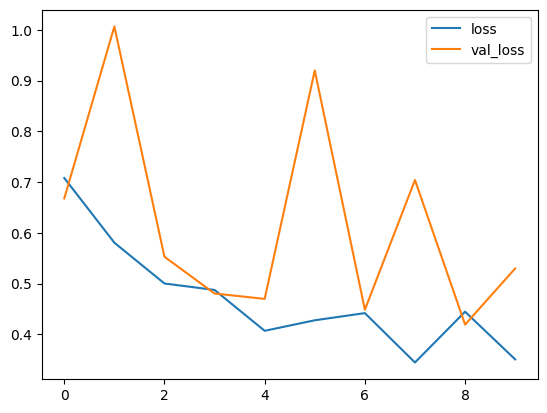

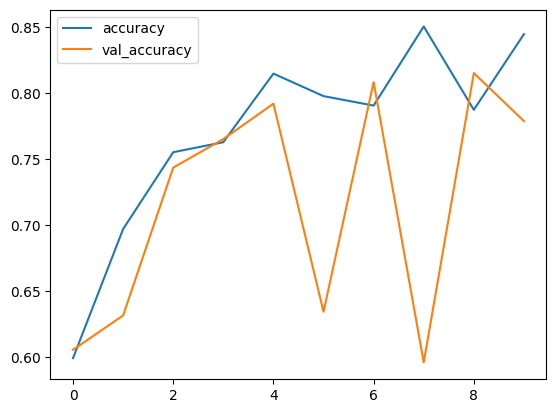

In [37]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
Cat


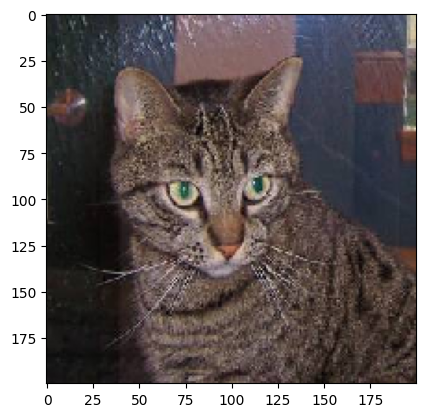

In [38]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/dog-vs-cat/cat/cat.1.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Dog


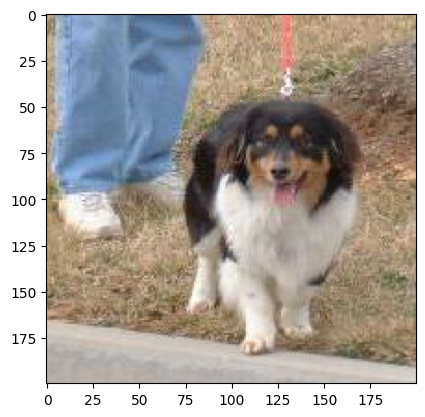

In [39]:
test_image = image.load_img('/content/dog-vs-cat/dog/dog.2.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")

In [21]:
from tensorflow.keras.applications import VGG19

In [22]:
base_model = VGG19(input_shape = (200, 200, 3), include_top=False, weights='imagenet')

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [23]:
base_model.trainable = False

In [24]:
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [25]:
inputs = Input(shape = (200, 200, 3))

x = base_model(inputs, training = False)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs = inputs, outputs = outputs)

In [26]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)

In [27]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 146s 178ms/step - accuracy: 0.8064 - loss: 1.2092 - val_accuracy: 0.9576 - val_loss: 0.1340
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 122s 173ms/step - accuracy: 0.9371 - loss: 0.2396 - val_accuracy: 0.9612 - val_loss: 0.1013
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 173ms/step - accuracy: 0.9426 - loss: 0.1736 - val_accuracy: 0.9652 - val_loss: 0.0904
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 133s 160ms/step - accuracy: 0.9398 - loss: 0.1668 - val_accuracy: 0.9612 - val_loss: 0.0948
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 121s 172ms/step - accuracy: 0.9459 - loss: 0.1535 - val_accuracy: 0.9664 - val_loss: 0.0913
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 143s 173ms/step - accuracy: 0.9420 - loss: 0.1559 - val_accuracy: 0.9644 - val_loss: 0.0897
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 133s 160ms/step - accuracy: 0.9428 - loss: 0.1577 - val_accuracy: 0.9636 - val_loss: 0.0932
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 142s 160ms/step - accuracy: 0.9423 -

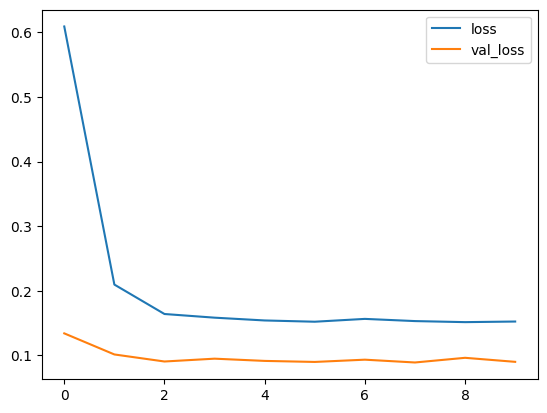

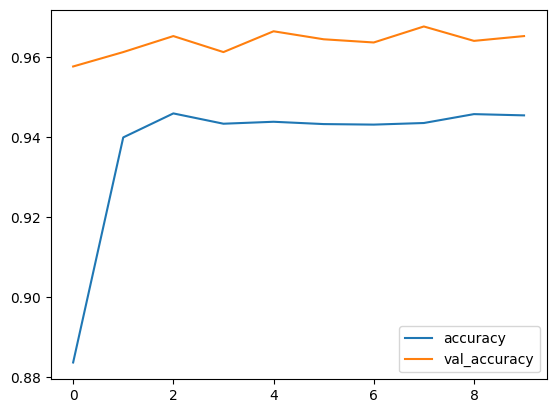

In [28]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Cat


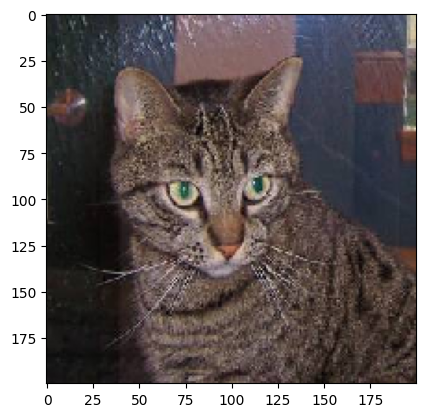

In [29]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('/content/dog-vs-cat/cat/cat.1.jpg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=0.5):
  print("Dog")
else:
  print("Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Dog


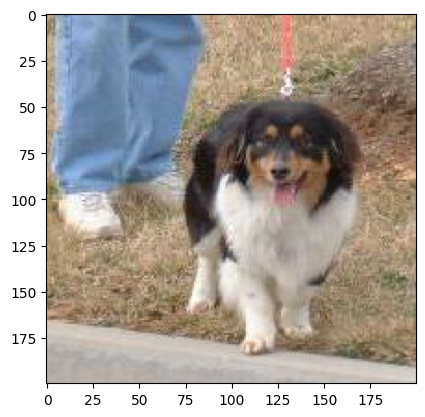

In [30]:
test_image = image.load_img('/content/dog-vs-cat/dog/dog.2.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")